# Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv("C:\\Users\\user\\EXCELR\\Assignments\\Decision Tree\\Company_Data.csv")
df.head(7)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No


In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
df1=df.copy()
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


C:\Users\user\EXCELR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


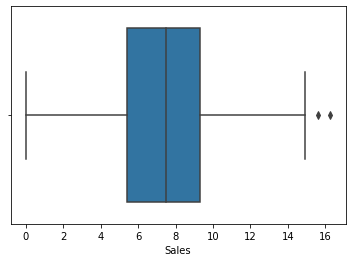

In [7]:
#outlier check
ax = sns.boxplot(df1['Sales'])

the data has 2 outliers

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


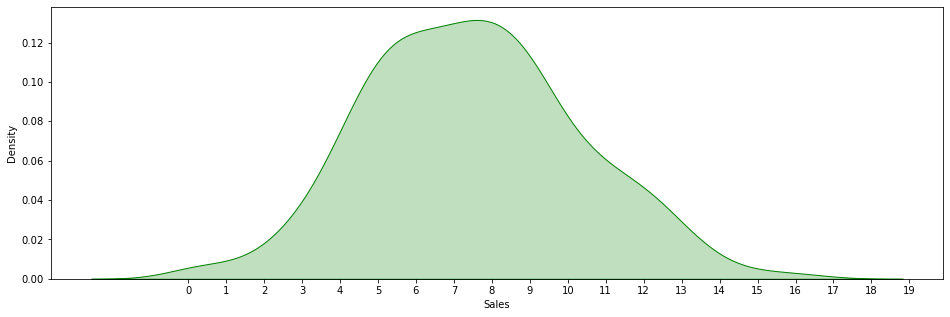

In [8]:
plt.rcParams["figure.figsize"] = 9,5
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Sales'].skew()))
print("Kurtosis: {}".format(df1['Sales'].kurtosis()))
ax = sns.kdeplot(df1['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

The data is Skwed on the right

The data has negative Kurtosis

In [9]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()

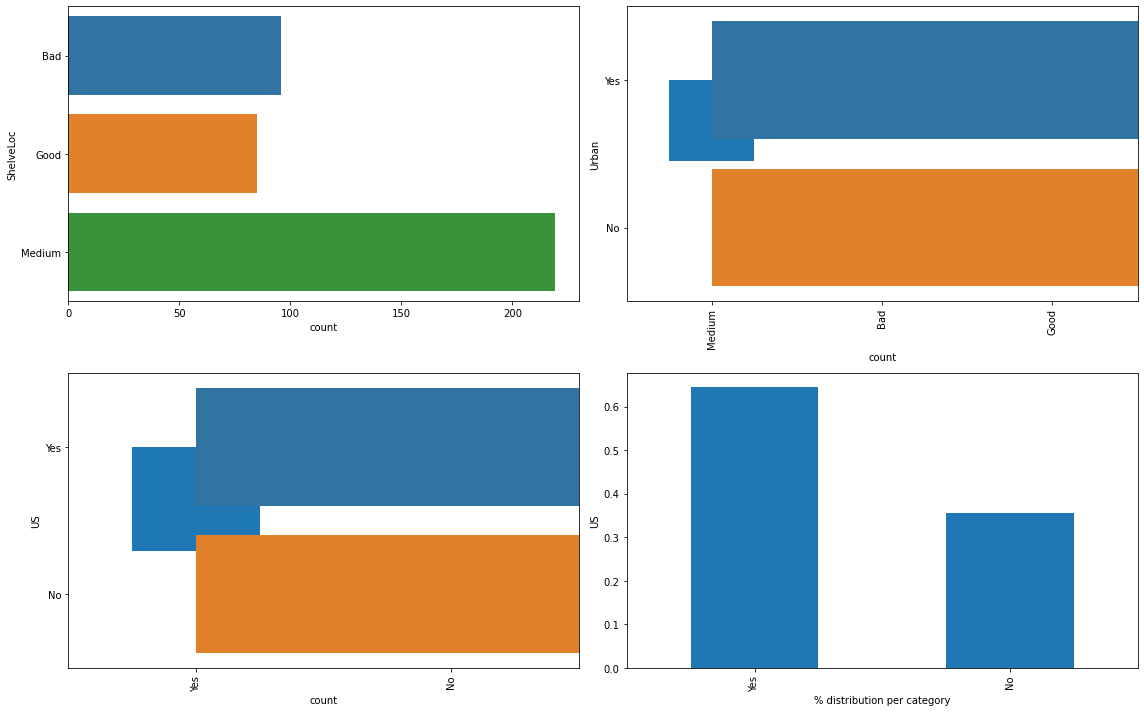

In [10]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

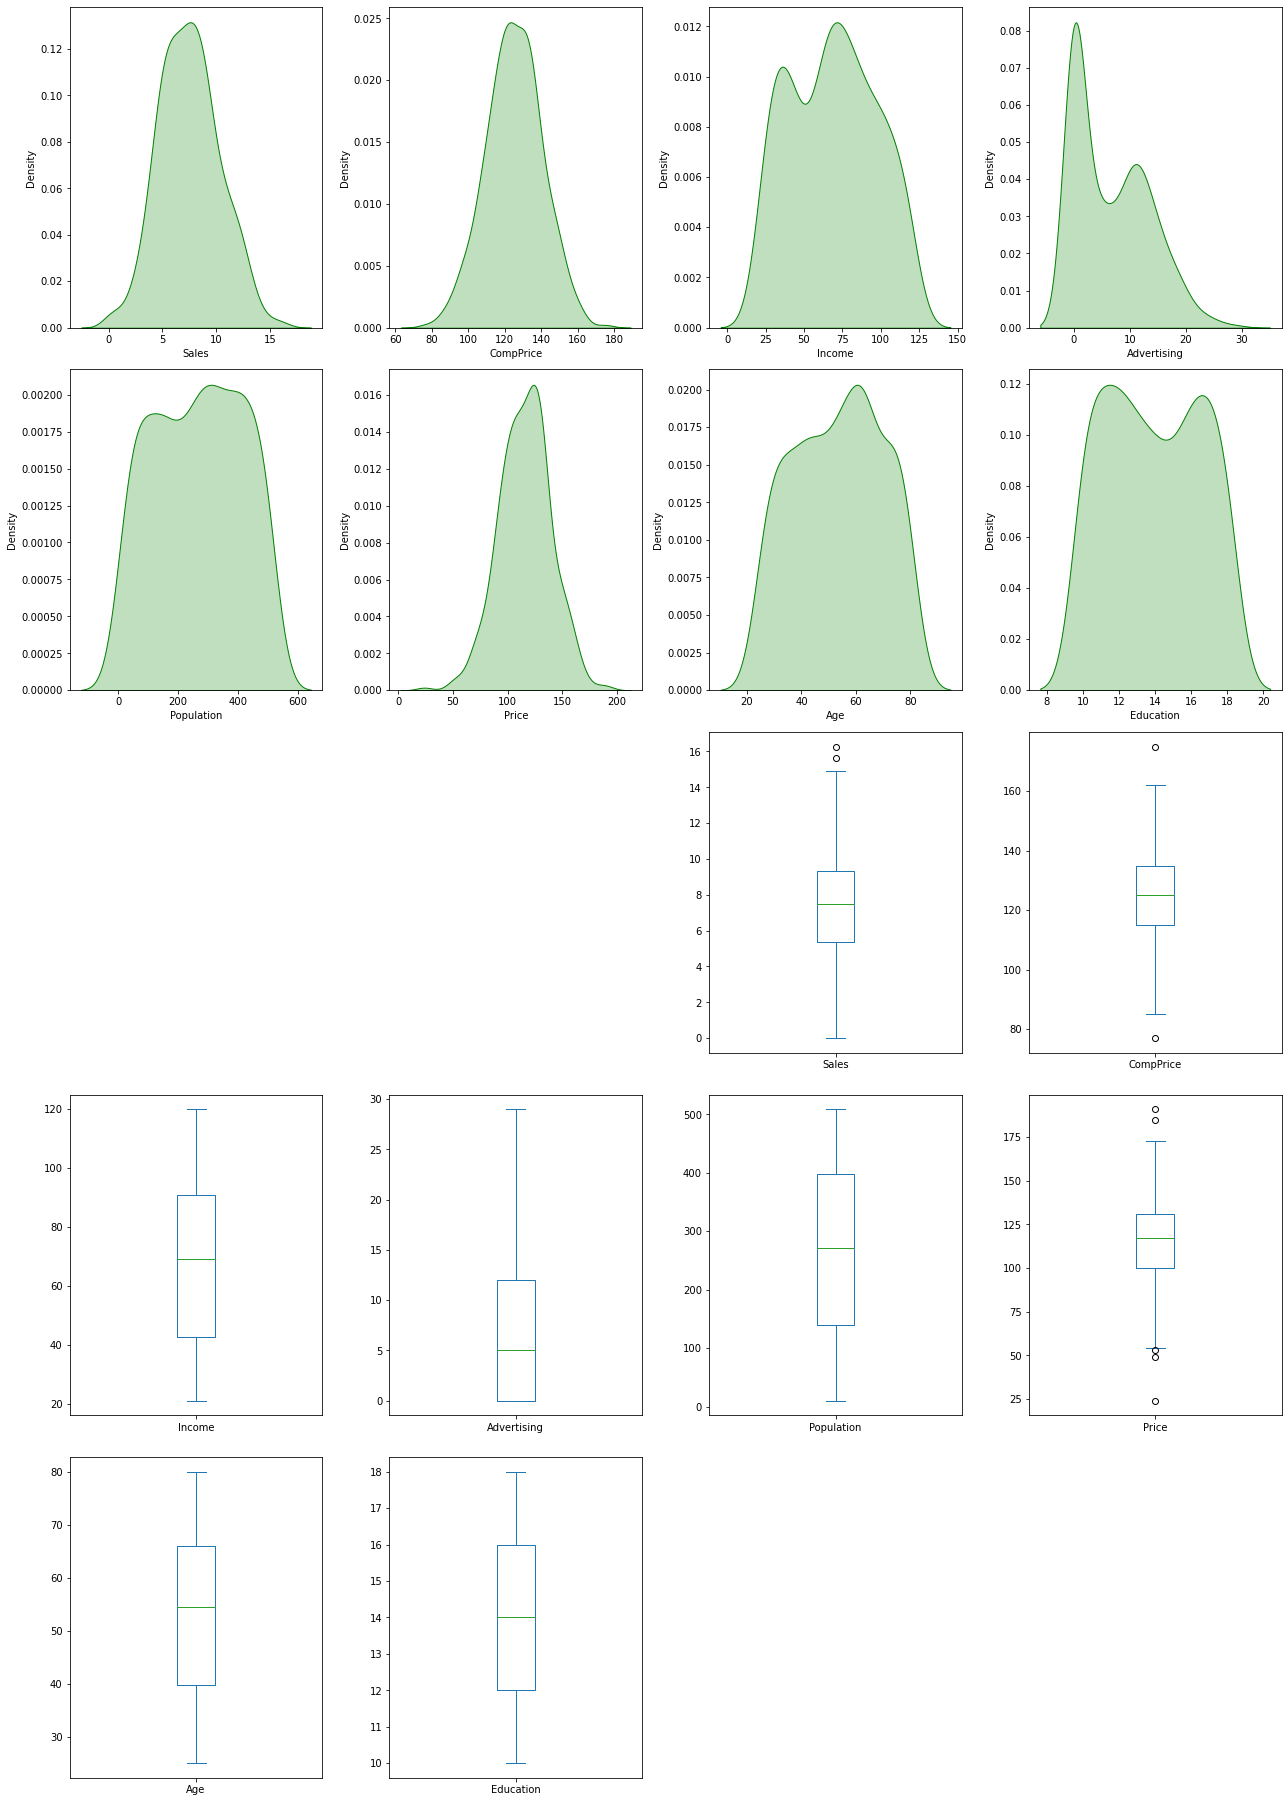

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [11]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

<AxesSubplot:>

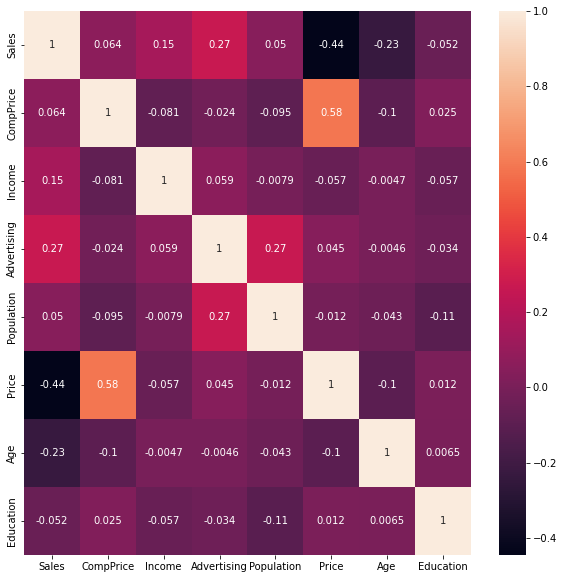

In [12]:
corr = df1.corr()
df1 = pd.get_dummies(df1, columns = ['ShelveLoc','Urban','US'])
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# Decision Tree Model

Since the target variable is continious, we create a class of the value based on the mean
<= 7.49 == "Small" and > 7.49 == "large"

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import externals
from io import StringIO

import seaborn as sns
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

In [14]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)

In [15]:
X = df1.iloc[:,0:14]
y = df1.iloc[:,14]

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y)

In [17]:
y_train.value_counts()

small    161
large    159
Name: sales, dtype: int64

In [18]:
model = DT(criterion='entropy') 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [19]:
pred_train = model.predict(x_train)
accuracy_score(y_train,pred_train)

1.0

In [20]:
confusion_matrix(y_train,pred_train)

array([[159,   0],
       [  0, 161]], dtype=int64)

In [21]:
pred_test = model.predict(x_test)


In [22]:
accuracy_score(y_test,pred_test)

0.7375

In [23]:
confusion_matrix(y_test,pred_test)

array([[28, 12],
       [ 9, 31]], dtype=int64)

In [24]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})
df_t

,Actual,Predicted
267,small,small
282,large,small
0,large,large
254,large,large
174,small,small
...,...,...
262,small,small
300,large,small
142,small,large
15,large,small


In [25]:
cols = list(df1.columns)
predictors = cols[0:14]
target = cols[14]

In [26]:
dot_data = StringIO()

In [27]:
export_graphviz(model,out_file = dot_data, filled =True, rounded = True, feature_names =predictors,class_names = target, impurity = False )

In [28]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [53]:

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [54]:
graph.write_png('C:\\Users\user\EXCELR\Assignments\Decision Treecompany_full.png')C:\Users\user\EXCELR\Assignments\Decision Tree

InvocationException: GraphViz's executables not found

# Conclusion

Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 70%
As seen in the confusion matrix of Test data 56 instances are presdected correctly and 24 instances are not

In [46]:
img = mpimg.imread('company_full.png') 

SyntaxError: not a PNG file (<string>)

In [47]:
plt.imshow(img)

NameError: name 'img' is not defined

In [48]:
model.feature_importances_

array([0.16266724, 0.10054913, 0.12464703, 0.02465256, 0.23779503,
       0.10053251, 0.02979961, 0.03282982, 0.14747676, 0.01818445,
       0.02086585, 0.        , 0.        , 0.        ])

In [49]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [50]:
fi

,feature,importance
4,Price,0.237795
0,CompPrice,0.162667
8,ShelveLoc_Good,0.147477
2,Advertising,0.124647
1,Income,0.100549
5,Age,0.100533
7,ShelveLoc_Bad,0.032830
6,Education,0.029800
3,Population,0.024653
10,Urban_No,0.020866


As seen in the above table Price is most important feature